In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, precision_recall_curve 

Using TensorFlow backend.


In [2]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 7

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

c1 = np.load('f_ideal_ch1_number_1.npy')
c1_0 = np.load('f_all_ch1_number.npy')

s1 = np.load('f_ideal_z_number_1.npy')
s1_0 = np.load('f_all_z_number.npy')

c2 = np.load('f_ideal_ch1_number_2.npy')
s2 = np.load('f_ideal_z_number_2.npy')

c3 = np.load('f_ideal_ch1_number_3.npy')
s3 = np.load('f_ideal_z_number_3.npy')

CH11 = np.concatenate((c1, c2,  c3))
CH10 = np.copy(c1_0)

z1 = np.concatenate((s1, s2, s3))
z0 = np.copy(s1_0)


a1 = np.load('f_ideal_x_number_1.npy')
a1_0 = np.load('f_all_x_number.npy')
b1 = np.load('f_ideal_y_number_1.npy')
b1_0 = np.load('f_all_y_number.npy')

a2 = np.load('f_ideal_x_number_2.npy')
b2 = np.load('f_ideal_y_number_2.npy')

a3 = np.load('f_ideal_x_number_3.npy')
b3 = np.load('f_ideal_y_number_3.npy')


x1 = np.concatenate((a1, a2, a3))
x0 = np.copy(a1_0)

y1 = np.concatenate((b1, b2, b3))
y0 = np.copy(b1_0)


d1 = np.load('f_ideal_diff_lay24_1.npy')
d1_0 = np.load('f_all_diff_lay24.npy')
e1 = np.load('f_ideal_diff_lay46_1.npy')
e1_0 = np.load('f_all_diff_lay46.npy')

d2 = np.load('f_ideal_diff_lay24_2.npy')
e2 = np.load('f_ideal_diff_lay46_2.npy')

d3 = np.load('f_ideal_diff_lay24_3.npy')
e3 = np.load('f_ideal_diff_lay46_3.npy')

diff_24_1 = np.concatenate((d1, d2, d3))
diff_24_0 = np.copy(d1_0)

diff_46_1 = np.concatenate((e1, e2, e3))
diff_46_0 = np.copy(e1_0)

diff1 = np.concatenate((diff_24_1, diff_46_1), axis = 1)
diff0 = np.concatenate((diff_24_0, diff_46_0), axis = 1)

In [3]:
c1 = np.load('f_ideal_ch1_number_1_cut.npy')
c2 = np.load('f_ideal_ch1_number_2_cut.npy')
c3 = np.load('f_ideal_ch1_number_3_cut.npy')
c4 = np.load('f_ideal_ch1_number_4_cut.npy')
c5 = np.load('f_ideal_ch1_number_5_cut.npy')
c6 = np.load('f_ideal_ch1_number_6_cut.npy')
c7 = np.load('f_ideal_ch1_number_7_cut.npy')
c8 = np.load('f_ideal_ch1_number_8_cut.npy')
c9 = np.load('f_ideal_ch1_number_9_cut.npy')
c10 = np.load('f_ideal_ch1_number_10_cut.npy')
c11 = np.load('f_ideal_ch1_number_11_cut.npy')
c12 = np.load('f_ideal_ch1_number_12_cut.npy')
c13 = np.load('f_ideal_ch1_number_13_cut.npy')
c14 = np.load('f_ideal_ch1_number_14_cut.npy')
c15 = np.load('f_ideal_ch1_number_15_cut.npy')
c161 = np.load('f_ideal_ch1_number_161_cut.npy')
c162 = np.load('f_ideal_ch1_number_162_cut.npy')

c17 = np.load('f_ideal_ch1_number_17_cut.npy')
c18 = np.load('f_ideal_ch1_number_18_cut.npy')
c19 = np.load('f_ideal_ch1_number_19_cut.npy')
c20 = np.load('f_ideal_ch1_number_20_cut.npy')
c21 = np.load('f_ideal_ch1_number_21_cut.npy')
c22 = np.load('f_ideal_ch1_number_22_cut.npy')
c23 = np.load('f_ideal_ch1_number_23_cut.npy')
c24 = np.load('f_ideal_ch1_number_24_cut.npy')
c25 = np.load('f_ideal_ch1_number_25_cut.npy')
c26 = np.load('f_ideal_ch1_number_26_cut.npy')
c27 = np.load('f_ideal_ch1_number_27_cut.npy')

c1_0 = np.load('f_all_ch1_number_24_cut.npy')
CH11 = np.concatenate((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c161, c162, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27))[:, 0:2]
CH10 = np.copy(c1_0)

In [4]:
len(CH11)

5020738

In [5]:
d1 = np.load('f_ideal_diff_lay24_1_cut.npy')
d2 = np.load('f_ideal_diff_lay24_2_cut.npy')
d3 = np.load('f_ideal_diff_lay24_3_cut.npy')
d4 = np.load('f_ideal_diff_lay24_4_cut.npy')
d5 = np.load('f_ideal_diff_lay24_5_cut.npy')
d6 = np.load('f_ideal_diff_lay24_6_cut.npy')
d7 = np.load('f_ideal_diff_lay24_7_cut.npy')
d8 = np.load('f_ideal_diff_lay24_8_cut.npy')
d9 = np.load('f_ideal_diff_lay24_9_cut.npy')
d10 = np.load('f_ideal_diff_lay24_10_cut.npy')
d11 = np.load('f_ideal_diff_lay24_11_cut.npy')
d12 = np.load('f_ideal_diff_lay24_12_cut.npy')
d13 = np.load('f_ideal_diff_lay24_13_cut.npy')
d14 = np.load('f_ideal_diff_lay24_14_cut.npy')
d15 = np.load('f_ideal_diff_lay24_15_cut.npy')
d161 = np.load('f_ideal_diff_lay24_161_cut.npy')
d162 = np.load('f_ideal_diff_lay24_162_cut.npy')
d17 = np.load('f_ideal_diff_lay24_17_cut.npy')
d18 = np.load('f_ideal_diff_lay24_18_cut.npy')
d19 = np.load('f_ideal_diff_lay24_19_cut.npy')
d20 = np.load('f_ideal_diff_lay24_20_cut.npy')
d21 = np.load('f_ideal_diff_lay24_21_cut.npy')
d22 = np.load('f_ideal_diff_lay24_22_cut.npy')
d23 = np.load('f_ideal_diff_lay24_23_cut.npy')
d24 = np.load('f_ideal_diff_lay24_24_cut.npy')
d25 = np.load('f_ideal_diff_lay24_25_cut.npy')
d26 = np.load('f_ideal_diff_lay24_26_cut.npy')
d27 = np.load('f_ideal_diff_lay24_27_cut.npy')


diff1 = np.concatenate((d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d161, d162, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27)).copy()
diff0 = np.load('f_all_diff_lay24__cut.npy')

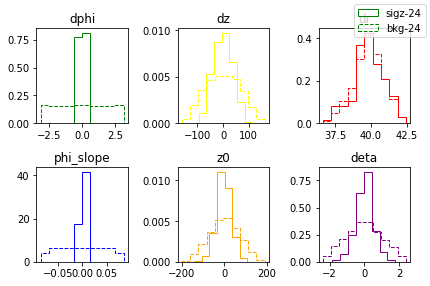

In [6]:
fig, axs = plt.subplots(2, 3)
b1 = np.linspace(1, 10, 50)
axs[0, 0].hist(diff1[:, 0], histtype='step', color = 'green', label='signal_dphi', density = True)
axs[0, 0].hist(diff0[:, 0], histtype='step', color='green', linestyle='dashed', label='bkg_dphi', density = True)
axs[0, 0].set_title('dphi')

b2 = np.linspace(-200, 200, 50)
axs[0, 1].hist(diff1[:, 1], histtype='step', color = 'yellow', label='signal_dz', density = True)
axs[0, 1].hist(diff0[:, 1], histtype='step', color='yellow', linestyle='dashed', label='bkg_dz', density = True)
axs[0, 1].set_title('dz')

b3 = np.linspace(36, 43, 50)
axs[0, 2].hist(diff1[:, 2], histtype='step', color = 'red', label='signal_dr', density = True)
axs[0, 2].hist(diff0[:, 2], histtype='step', color='red', linestyle='dashed', label='bkg_dr', density = True)
axs[0, 2].set_title('dr')

b4 = np.linspace(-0.1, 0.3, 50)
axs[1, 0].hist(diff1[:, 3], histtype='step', color = 'blue', label='signal_phislope', density = True)
axs[1, 0].hist(diff0[:, 3], histtype='step', color='blue', linestyle='dashed', label='bkg_phislope', density = True)
axs[1, 0].set_title('phi_slope')

b5 = np.linspace(-200, 200, 50)
axs[1, 1].hist(diff1[:, 4], histtype='step', color = 'orange', label='signal_z0', density = True)
axs[1, 1].hist(diff0[:, 4], histtype='step', color='orange', linestyle='dashed', label='bkg_z0', density = True)
axs[1, 1].set_title('z0')

b6 = np.linspace(-3, 3, 50)
axs[1, 2].hist(diff1[:, 5], histtype='step', color = 'purple', label='signal_deta', density = True)
axs[1, 2].hist(diff0[:, 5], histtype='step', color='purple', linestyle='dashed', label='bkg_deta', density = True)
axs[1, 2].set_title('deta')
plt.tight_layout()

fig.legend(['sigz-24', 'bkg-24'])

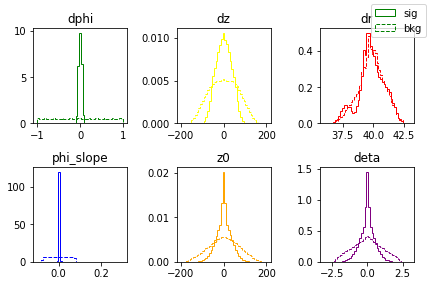

In [7]:
fig, axs = plt.subplots(2, 3)
b1 = np.linspace(-1, 1, 50)
axs[0, 0].hist(diff1[:, 0], histtype='step', color = 'green', label='signal_dphi', density = True, bins = b1)
axs[0, 0].hist(diff0[:, 0], histtype='step', color='green', linestyle='dashed', label='bkg_dphi', density = True, bins = b1)
axs[0, 0].set_title('dphi')

b2 = np.linspace(-200, 200, 50)
axs[0, 1].hist(diff1[:, 1], histtype='step', color = 'yellow', label='signal_dz', density = True, bins = b2)
axs[0, 1].hist(diff0[:, 1], histtype='step', color='yellow', linestyle='dashed', label='bkg_dz', density = True, bins = b2)
axs[0, 1].set_title('dz')

b3 = np.linspace(36, 43, 50)
axs[0, 2].hist(diff1[:, 2], histtype='step', color = 'red', label='signal_dr', density = True, bins = b3)
axs[0, 2].hist(diff0[:, 2], histtype='step', color='red', linestyle='dashed', label='bkg_dr', density = True, bins = b3)
axs[0, 2].set_title('dr')

b4 = np.linspace(-0.1, 0.3, 50)
axs[1, 0].hist(diff1[:, 3], histtype='step', color = 'blue', label='signal_phislope', density = True, bins = b4)
axs[1, 0].hist(diff0[:, 3], histtype='step', color='blue', linestyle='dashed', label='bkg_phislope', density = True, bins = b4)
axs[1, 0].set_title('phi_slope')

b5 = np.linspace(-200, 200, 50)
axs[1, 1].hist(diff1[:, 4], histtype='step', color = 'orange', label='signal_z0', density = True, bins = b5)
axs[1, 1].hist(diff0[:, 4], histtype='step', color='orange', linestyle='dashed', label='bkg_z0', density = True, bins = b5)
axs[1, 1].set_title('z0')

b6 = np.linspace(-3, 3, 50)
axs[1, 2].hist(diff1[:, 5], histtype='step', color = 'purple', label='signal_deta', density = True, bins = b6)
axs[1, 2].hist(diff0[:, 5], histtype='step', color='purple', linestyle='dashed', label='bkg_deta', density = True, bins = b6)
axs[1, 2].set_title('deta')
plt.tight_layout()

fig.legend(['sig', 'bkg'])

In [8]:
from sklearn import preprocessing
ddd = preprocessing.scale(np.concatenate([diff1, diff0]))
ddiff1 = ddd[:len(diff1), :]
ddiff0 = ddd[len(diff1):, :]

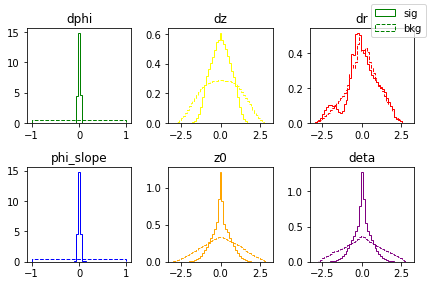

In [9]:
fig, axs = plt.subplots(2, 3)
b1 = np.linspace(-1, 1, 50)
axs[0, 0].hist(ddiff1[:, 0], histtype='step', color = 'green', label='signal_dphi', density = True, bins = b1)
axs[0, 0].hist(ddiff0[:, 0], histtype='step', color='green', linestyle='dashed', label='bkg_dphi', density = True, bins = b1)
axs[0, 0].set_title('dphi')

b2 = np.linspace(-3, 3, 50)
axs[0, 1].hist(ddiff1[:, 1], histtype='step', color = 'yellow', label='signal_dz', density = True, bins = b2)
axs[0, 1].hist(ddiff0[:, 1], histtype='step', color='yellow', linestyle='dashed', label='bkg_dz', density = True, bins = b2)
axs[0, 1].set_title('dz')

b3 = np.linspace(-3, 3, 50)
axs[0, 2].hist(ddiff1[:, 2], histtype='step', color = 'red', label='signal_dr', density = True, bins = b3)
axs[0, 2].hist(ddiff0[:, 2], histtype='step', color='red', linestyle='dashed', label='bkg_dr', density = True, bins = b3)
axs[0, 2].set_title('dr')

b4 = np.linspace(-1, 1, 50)
axs[1, 0].hist(ddiff1[:, 3], histtype='step', color = 'blue', label='signal_phislope', density = True, bins = b4)
axs[1, 0].hist(ddiff0[:, 3], histtype='step', color='blue', linestyle='dashed', label='bkg_phislope', density = True, bins = b4)
axs[1, 0].set_title('phi_slope')

b5 = np.linspace(-3, 3, 50)
axs[1, 1].hist(ddiff1[:, 4], histtype='step', color = 'orange', label='signal_z0', density = True, bins = b5)
axs[1, 1].hist(ddiff0[:, 4], histtype='step', color='orange', linestyle='dashed', label='bkg_z0', density = True, bins = b5)
axs[1, 1].set_title('z0')

b6 = np.linspace(-3, 3, 50)
axs[1, 2].hist(ddiff1[:, 5], histtype='step', color = 'purple', label='signal_deta', density = True, bins = b5)
axs[1, 2].hist(ddiff0[:, 5], histtype='step', color='purple', linestyle='dashed', label='bkg_deta', density = True, bins = b5)
axs[1, 2].set_title('deta')
plt.tight_layout()

fig.legend(['sig', 'bkg'])
fig.savefig('spatial parameters distribution.pdf', bbox_inches='tight')

In [10]:
diff1

array([[-4.88041473e-03, -2.17709007e+01,  3.97975205e+01,
        -1.22631125e-04,  5.58730049e+00, -8.26607302e-02],
       [-4.88041473e-03, -2.17709007e+01,  3.97975205e+01,
        -1.22631125e-04,  5.58730049e+00, -8.26607302e-02],
       [-4.81598709e-03, -2.07368011e+01,  3.79059905e+01,
        -1.27050818e-04,  5.58787451e+00, -8.08503310e-02],
       ...,
       [-5.81259270e-02,  3.51961021e+01,  4.13927705e+01,
        -1.40425312e-03,  1.10047765e+01, -1.33725268e-01],
       [-5.48840889e-02, -2.98335109e+01,  4.03580364e+01,
        -1.35992961e-03,  6.08383131e+01, -9.05373028e-01],
       [ 3.54378164e-02,  1.05188007e+01,  4.08878700e+01,
         8.66707323e-04,  6.14845438e+00, -1.01108036e-01]])

In [11]:
trues = np.array(len(CH11)*[1])
falses = np.array(len(CH10)*[0])

In [12]:
len(falses), len(trues)

(9345375, 5020738)

In [13]:
train_number_signal = int(np.rint(len(CH11)*0.8))
validation_number_signal = int(np.rint(len(CH11)*0.1))
test_number_signal = len(CH11)-train_number_signal-validation_number_signal

train_number_background = int(np.rint(len(CH10)*0.8))
validation_number_background = int(np.rint(len(CH10)*0.1))
test_number_background = len(CH10)-train_number_background-validation_number_background

In [14]:
train_number_signal

4016590

In [15]:
train_number_background

7476300

In [16]:
test_number_background

934537

In [17]:
test_number_signal

502074

In [18]:
train_number_signal/train_number_background

0.53724302128058

In [19]:
1785/9345375

0.00019100357128526142

In [20]:
np.random.seed(0)
indices_1 = np.random.permutation(len(CH11))
train_c1 = CH11[indices_1[:train_number_signal]]
test_c1 = CH11[indices_1[train_number_signal+validation_number_signal:]]
validate_c1 = CH11[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

train_1 = diff1[indices_1[:train_number_signal]]
test_1 = diff1[indices_1[train_number_signal+validation_number_signal:]]
validate_1 = diff1[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

In [21]:
np.random.seed(1)
indices_0 = np.random.permutation(len(CH10))
train_c0 = CH10[indices_0[:train_number_background]]
test_c0 = CH10[indices_0[train_number_background+validation_number_background:]]
validate_c0 = CH10[indices_0[train_number_background:train_number_background+validation_number_background]]

train_0 = diff0[indices_0[:train_number_background]]
test_0 = diff0[indices_0[train_number_background+validation_number_background:]]
validate_0 = diff0[indices_0[train_number_background:train_number_background+validation_number_background]]

In [22]:
train_c0

array([[2., 6.],
       [3., 3.],
       [3., 5.],
       ...,
       [2., 2.],
       [6., 6.],
       [3., 2.]])

In [23]:
trues_train = trues[indices_1[:train_number_signal]]
trues_test = trues[indices_1[train_number_signal+validation_number_signal:]]
trues_validate = trues[indices_1[train_number_signal:train_number_signal+validation_number_signal]]
falses_train = falses[indices_0[:train_number_background]]
falses_test = falses[indices_0[train_number_background+validation_number_background:]]
falses_validate = falses[indices_0[train_number_background:train_number_background+validation_number_background]]

In [24]:
train_total_1 = np.c_[train_1, train_c1]
test_total_1 = np.c_[test_1, test_c1]
validate_total_1 = np.c_[validate_1, validate_c1]
train_total_0 = np.c_[train_0, train_c0]
test_total_0 = np.c_[test_0, test_c0]
validate_total_0 = np.c_[validate_0, validate_c0]

In [25]:
train = np.array(list(train_1) + list(train_0))
test = np.array(list(test_1) + list(test_0))
validate = np.array(list(validate_1) + list(validate_0))

train_c = np.array(list(train_c1) + list(train_c0))
test_c = np.array(list(test_c1) + list(test_c0))
validate_c = np.array(list(validate_c1) + list(validate_c0))

indicator_train = np.array(list(trues_train) + list(falses_train))
indicator_test = np.array(list(trues_test) + list(falses_test))
indicator_validate = np.array(list(trues_validate) + list(falses_validate))

train_total = np.array(list(train_total_1) + list(train_total_0))
test_total = np.array(list(test_total_1) + list(test_total_0))
validate_total = np.array(list(validate_total_1) + list(validate_total_0))

from sklearn import preprocessing

train_scaled = preprocessing.scale(train)
validate_scaled = preprocessing.scale(validate)
test_scaled = preprocessing.scale(test)

train_total_scaled = np.c_[train_scaled, train_c]
test_total_scaled = np.c_[test_scaled, test_c]
validate_total_scaled = np.c_[validate_scaled, validate_c]

In [26]:
np.shape(train)

(11492890, 6)

In [27]:
train

array([[ 4.13467007e-02, -3.43034000e+01,  4.05592896e+01,
         1.01941383e-03,  5.14907131e+00, -7.20282454e-02],
       [ 2.83177831e-02, -2.25191994e+01,  3.92171944e+01,
         7.22075701e-04, -2.15863330e+01,  2.51132140e-01],
       [-4.65456603e-02, -1.38558006e+01,  4.11778059e+01,
        -1.13035795e-03, -3.00398438e+01,  3.72420230e-01],
       ...,
       [-2.13818335e+00,  8.01819000e+01,  3.87066744e+01,
        -5.52406887e-02, -1.01499809e+02,  1.52508608e+00],
       [-3.14048199e+00,  1.02917702e+02,  3.88925673e+01,
        -8.07476134e-02, -1.21314998e+02,  1.80433665e+00],
       [ 2.94860751e+00,  8.58848991e+01,  3.88855070e+01,
         7.58279302e-02, -9.83148277e+01,  1.47492976e+00]])

In [28]:
indicator_train

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
# create model
model_clasify = Sequential()
es = EarlyStopping(monitor='val_acc', min_delta=0.0001)
model_clasify.add(Dense(128, input_dim=6, activation='relu'))
model_clasify.add(Dense(64, activation='relu'))
model_clasify.add(Dense(32, activation='relu'))
model_clasify.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr = 0.001)

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model_clasify.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_clasify.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [32]:
a = model_clasify.fit(train, indicator_train, validation_data = (validate, indicator_validate), epochs=3000, callbacks = [es], batch_size=2000, class_weight={0: 1, 1: len(falses)/len(trues)})

Instructions for updating:
Use tf.cast instead.
Train on 11492890 samples, validate on 1436612 samples
Epoch 1/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.1442 - acc: 0.9591 - val_loss: 0.0901 - val_acc: 0.9733
Epoch 2/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.1068 - acc: 0.9748 - val_loss: 0.0914 - val_acc: 0.9732


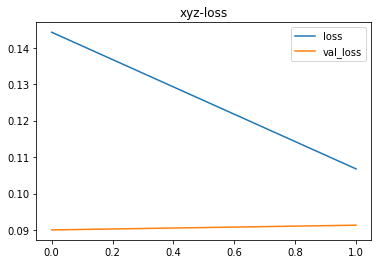

In [33]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('xyz-loss')
plt.legend(['loss', 'val_loss'])

In [34]:
predictions_clasify = model_clasify.predict(test)
predictions_clasify

array([[9.7330308e-01],
       [9.4315445e-01],
       [9.9250007e-01],
       ...,
       [1.0647892e-03],
       [6.0418888e-04],
       [7.0918938e-03]], dtype=float32)

In [35]:
len(predictions_clasify)

1436611

In [36]:
np.std(predictions_clasify)

0.46022865

In [37]:
indicator_test

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
fpr_clasify, tpr_clasify, _ = roc_curve(indicator_test, predictions_clasify)

Text(0, 0.5, 'true-positive-rate')

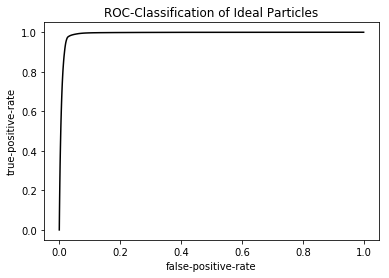

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr_clasify, tpr_clasify, color='black')
plt.title('ROC-Classification of Ideal Particles')
plt.xlabel('false-positive-rate')
plt.ylabel('true-positive-rate')

In [40]:
train_c

array([[6., 6.],
       [2., 3.],
       [2., 2.],
       ...,
       [2., 2.],
       [6., 6.],
       [3., 2.]])

In [41]:
# create model
model_clasify_c = Sequential()
es = EarlyStopping(monitor='val_acc', min_delta=0.0001)
model_clasify_c.add(Dense(128, input_dim=2, activation='relu'))
model_clasify_c.add(Dense(64, activation='relu'))
model_clasify_c.add(Dense(32, activation='relu'))
model_clasify_c.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr = 0.001)
model_clasify_c.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [42]:
b = model_clasify_c.fit(train_c, indicator_train, validation_data = (validate_c, indicator_validate), epochs=3000, callbacks = [es], class_weight={0: 1, 1: len(falses)/len(trues)}, batch_size=2000)

Train on 11492890 samples, validate on 1436612 samples
Epoch 1/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.5497 - acc: 0.7516 - val_loss: 0.4316 - val_acc: 0.7531
Epoch 2/3000
11492890/11492890 [==============================] - 63s 5us/step - loss: 0.5453 - acc: 0.7502 - val_loss: 0.4380 - val_acc: 0.7531


In [43]:
indicator_train

array([1, 1, 1, ..., 0, 0, 0])

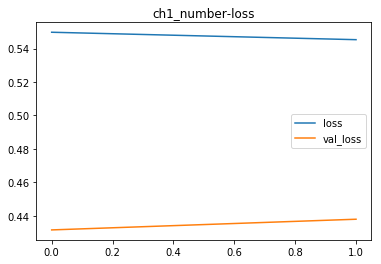

In [44]:
plt.plot(b.history['loss'])
plt.plot(b.history['val_loss'])
plt.title('ch1_number-loss')
plt.legend(['loss', 'val_loss'])

In [45]:
predictions_clasify_c = model_clasify_c.predict(test_c)
predictions_clasify_c

array([[0.8709927 ],
       [0.8709927 ],
       [0.7597616 ],
       ...,
       [0.5630924 ],
       [0.00359946],
       [0.4991832 ]], dtype=float32)

In [46]:
fpr_clasify_c, tpr_clasify_c, _ = roc_curve(indicator_test, predictions_clasify_c)

Text(0.5, 1.0, 'ROC-CURVE')

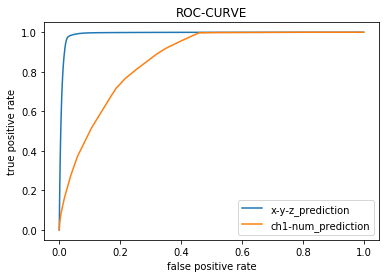

In [47]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction'])
plt.title('ROC-CURVE')

In [48]:
a_ = []
for i in fpr_clasify:
    if i == 0:
        a_.append(test_number_background)
    else:
        a_.append(1.0/i)

In [49]:
b_ = []
for i in fpr_clasify_c:
    if i == 0:
        b_.append(test_number_background)
    else:
        b_.append(1.0/i)

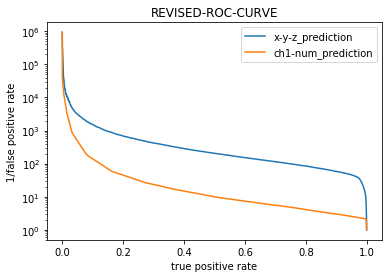

In [50]:
plt.plot(tpr_clasify, np.array(a_))
plt.plot(tpr_clasify_c, np.array(b_))
plt.xlabel('true positive rate')
plt.ylabel('1/false positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction'])
plt.title('REVISED-ROC-CURVE')
plt.yscale('log')

In [51]:
model_clasify_t = Sequential()
adam = optimizers.Adam(lr = 0.001)
es = EarlyStopping(monitor='val_acc', min_delta=0.0001)
model_clasify_t.add(Dense(128, input_dim=8, activation='relu'))
model_clasify_t.add(Dense(64, activation='relu'))
model_clasify_t.add(Dense(32, activation='relu'))
model_clasify_t.add(Dense(1, activation='sigmoid'))
model_clasify_t.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [52]:
c = model_clasify_t.fit(train_total, indicator_train, validation_data = (validate_total, indicator_validate), epochs=3000, callbacks = [es], batch_size=2000, class_weight={0: 1, 1: len(falses)/len(trues)})

Train on 11492890 samples, validate on 1436612 samples
Epoch 1/3000
11492890/11492890 [==============================] - 67s 6us/step - loss: 0.0913 - acc: 0.9754 - val_loss: 0.0391 - val_acc: 0.9890
Epoch 2/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.0466 - acc: 0.9892 - val_loss: 0.0356 - val_acc: 0.9895
Epoch 3/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.0434 - acc: 0.9897 - val_loss: 0.0326 - val_acc: 0.9902
Epoch 4/3000
11492890/11492890 [==============================] - 64s 6us/step - loss: 0.0417 - acc: 0.9899 - val_loss: 0.0320 - val_acc: 0.9902


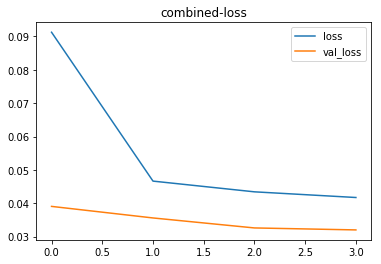

In [53]:
plt.plot(c.history['loss'])
plt.plot(c.history['val_loss'])
plt.title('combined-loss')
plt.legend(['loss', 'val_loss'])

In [54]:
predictions_clasify_t = model_clasify_t.predict(test_total)
predictions_clasify_t

array([[9.9952966e-01],
       [9.9971902e-01],
       [9.9974895e-01],
       ...,
       [1.0975752e-03],
       [9.2126269e-05],
       [5.8324014e-05]], dtype=float32)

In [55]:
fpr_clasify_t, tpr_clasify_t, _ = roc_curve(indicator_test, predictions_clasify_t)

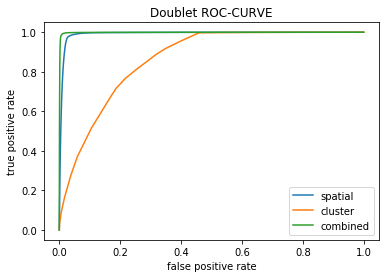

In [56]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.plot(fpr_clasify_t, tpr_clasify_t)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('Doublet ROC-CURVE')
plt.savefig('doublet roc curve.pdf', bbox_inches='tight')

In [57]:
c_ = []
for i in fpr_clasify_t:
    if i == 0:
        c_.append(test_number_background)
    else:
        c_.append(1.0/i)

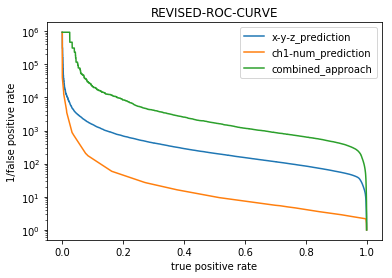

In [58]:
plt.plot(tpr_clasify, np.array(a_))
plt.plot(tpr_clasify_c, np.array(b_))
plt.plot(tpr_clasify_t, np.array(c_))
plt.xlabel('true positive rate')
plt.ylabel('1/false positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('REVISED-ROC-CURVE')
plt.yscale('log')

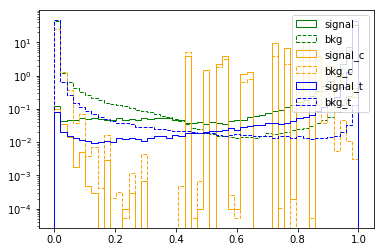

In [59]:
bb = np.linspace(0, 1, 50)
plt.hist(predictions_clasify[:len(trues_test)], histtype='step', color='green', label='signal', density=True, bins = bb)
plt.hist(predictions_clasify[len(trues_test):], histtype='step', color='green', linestyle='dashed', label='bkg', density =True, bins = bb)
plt.hist(predictions_clasify_c[:len(trues_test)], histtype='step', color='orange', label='signal_c', density =True, bins = bb)
plt.hist(predictions_clasify_c[len(trues_test):], histtype='step', color='orange', linestyle='dashed', label='bkg_c', density =True, bins = bb)
plt.hist(predictions_clasify_t[:len(trues_test)], histtype='step', color='blue', label='signal_t', density =True, bins = bb)
plt.hist(predictions_clasify_t[len(trues_test):], histtype='step', color='blue', linestyle='dashed', label='bkg_t', density =True, bins = bb)

plt.yscale('log')
plt.legend()

In [60]:
e1 = pd.read_pickle('ideal_final_data_cut.pkl')
e2 = pd.read_pickle('final_data2_cut.pkl')
e3 = pd.read_pickle('final_data3_cut.pkl')
e4 = pd.read_pickle('final_data4_cut.pkl')
e5 = pd.read_pickle('final_data5_cut.pkl')
e6 = pd.read_pickle('final_data6_cut.pkl')
e7 = pd.read_pickle('final_data7_cut.pkl')
e8 = pd.read_pickle('final_data8_cut.pkl')
e9 = pd.read_pickle('final_data9_cut.pkl')
e10 = pd.read_pickle('final_data10_cut.pkl')
e11 = pd.read_pickle('final_data11_cut.pkl')
e12 = pd.read_pickle('final_data12_cut.pkl')
e13 = pd.read_pickle('final_data13_cut.pkl')
e14 = pd.read_pickle('final_data14_cut.pkl')
e15 = pd.read_pickle('final_data15_cut.pkl')
e161 = pd.read_pickle('final_data161_cut.pkl')
e162 = pd.read_pickle('final_data162_cut.pkl')

e17 = pd.read_pickle('final_data17_cut.pkl')
e18 = pd.read_pickle('final_data18_cut.pkl')
e19 = pd.read_pickle('final_data19_cut.pkl')
e20 = pd.read_pickle('final_data20_cut.pkl')
e21 = pd.read_pickle('final_data21_cut.pkl')
e22 = pd.read_pickle('final_data22_cut.pkl')
e23 = pd.read_pickle('final_data23_cut.pkl')
e24 = pd.read_pickle('final_data24_cut.pkl')
e25 = pd.read_pickle('final_data25_cut.pkl')
e26 = pd.read_pickle('final_data26_cut.pkl')
e27 = pd.read_pickle('final_data27_cut.pkl')
e = pd.concat([e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e161, e162, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27])
e

,event_id,hit_id,eta,layer_id,module_id,nch0,nch1,particle_id,tpx,tpy,tpz,volume_id,x,y,z
20042,1000,20043.0,-0.372461,2.0,97.0,3.0,2.0,1.080958e+17,-2.771100,-0.023715,-1.515780,8.0,-33.674000,-0.446628,-12.835400
21826,1000,21827.0,-0.364603,2.0,112.0,1.0,2.0,1.080958e+17,-2.771340,-0.024289,-1.515410,8.0,-32.010101,-0.440721,-11.932400
29668,1000,29669.0,-0.455122,4.0,193.0,3.0,2.0,1.080958e+17,-2.770970,0.000340,-1.514780,8.0,-73.471901,-0.615863,-34.606300
30703,1000,30704.0,-0.453312,4.0,224.0,1.0,3.0,1.080958e+17,-2.770980,-0.001129,-1.515090,8.0,-71.580399,-0.604620,-33.572201
37345,1000,37346.0,-0.480718,6.0,313.0,2.0,2.0,1.080958e+17,-2.768900,0.027852,-1.513700,8.0,-117.384003,-0.393283,-58.627499
38162,1000,38163.0,-0.479987,6.0,364.0,2.0,2.0,1.080958e+17,-2.768750,0.026067,-1.514100,8.0,-115.445999,-0.404245,-57.565300
43651,1000,43652.0,-0.494011,8.0,391.0,2.0,2.0,1.080958e+17,-2.768500,0.058717,-1.512330,8.0,-172.957001,0.472070,-88.960899
44183,1000,44184.0,-0.493657,8.0,468.0,2.0,3.0,1.080958e+17,-2.768770,0.057969,-1.511960,8.0,-170.962006,0.427640,-87.866699
20043,1000,20044.0,-1.095952,2.0,97.0,2.0,5.0,5.944780e+17,-0.319480,0.002672,-0.442060,8.0,-34.331402,1.433860,-45.662899
21914,1000,21915.0,-1.093295,2.0,112.0,1.0,5.0,5.944780e+17,-0.319730,0.004456,-0.442086,8.0,-31.905899,1.406340,-42.300098


In [61]:
ha = 1
number_of_events = len(e['event_id'].unique())
#per event based purity. TPR & FPR will not change either per event or not, if not per event based, excluding ha and number_of_events terms in the last part of its calculation.
def purity_evaluation(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test)/ha)/(len(trues_test)/number_of_events)))
    return np.array(purity)

In [62]:
number_of_events

1650

In [63]:
haha = np.array([1/ha] * len(falses_test))
hehe = np.array([1/number_of_events] * len(trues_test))
weights = np.array(list(hehe) + list(haha))
weights

array([6.06060606e-04, 6.06060606e-04, 6.06060606e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [64]:
pure_clasify = purity_evaluation(tpr_clasify, fpr_clasify)
pure_clasify_c = purity_evaluation(tpr_clasify_c, fpr_clasify_c)
pure_clasify_t = purity_evaluation(tpr_clasify_t, fpr_clasify_t)

Text(0.5, 1.0, 'Efficiency vs Purity')

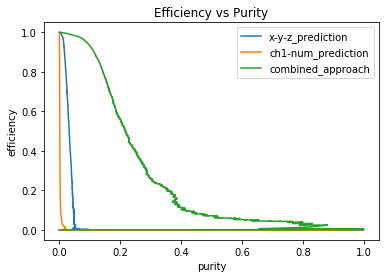

In [65]:
plt.plot(pure_clasify, tpr_clasify)
plt.plot(pure_clasify_c, tpr_clasify_c)
plt.plot(pure_clasify_t, tpr_clasify_t)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('Efficiency vs Purity')

In [66]:
pur, eff, thr = precision_recall_curve(indicator_test, predictions_clasify, sample_weight = weights)
pur_c, eff_c, thr_c = precision_recall_curve(indicator_test, predictions_clasify_c, sample_weight = weights)
pur_t, eff_t, thr_t = precision_recall_curve(indicator_test, predictions_clasify_t, sample_weight = weights)

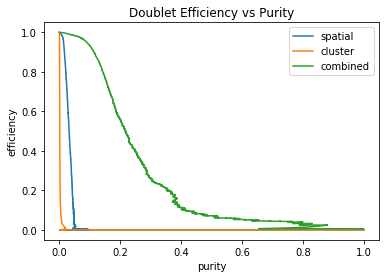

In [67]:
plt.plot(pur, eff)
plt.plot(pur_c, eff_c)
plt.plot(pur_t, eff_t)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('Doublet Efficiency vs Purity')
plt.savefig('doublet purity vs efficiency.pdf', bbox_inches='tight')

In [68]:
the_cuts = np.array([j for i, j in zip(eff_t[:-1], thr_t) if (i >= 0.85 and i <= 0.95)])
the_cuts

array([0.9691829 , 0.9691844 , 0.9691869 , ..., 0.99260527, 0.9926053 ,
       0.9926054 ], dtype=float32)

In [69]:
np.mean(the_cuts)

0.9853059

In [70]:
model_clasify.save('ff_model_clasify_cut.h5')
model_clasify_c.save('ff_model_clasify_c_cut.h5')
model_clasify_t.save('ff_model_clasify_t_cut.h5')


In [71]:
model_clasify = load_model('ff_model_clasify_cut.h5')
model_clasify_c = load_model('ff_model_clasify_c_cut.h5')
model_clasify_t = load_model('ff_model_clasify_t_cut.h5')